In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy

matplotlib.rc('font', family = 'Malgun Gothic')

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submission = pd.read_csv("SampleSubmission.csv")

In [4]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [5]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

# Data 확인

In [6]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# datetime 변경

In [7]:
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

# 데이터 정보

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


# EDA

## 1. 기준별 자전거 수요량 확인하기

In [10]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['min'] = train['datetime'].dt.minute
train['sec'] = train['datetime'].dt.second
train['dayofweek'] = train['datetime'].dt.dayofweek

In [11]:
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['min'] = test['datetime'].dt.minute
test['sec'] = test['datetime'].dt.second
test['dayofweek'] = test['datetime'].dt.dayofweek

### 1. 연도별 자전거 수요량

Text(0.5, 1.0, '연도별 자전거 수요량')

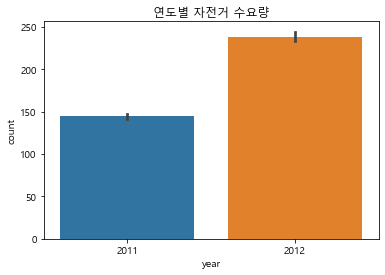

In [12]:
sns.barplot(data = train, x='year', y= 'count')
plt.title('연도별 자전거 수요량')

### 2. 월별 자전거 수요량

Text(0.5, 1.0, '월별 자전거 수요량')

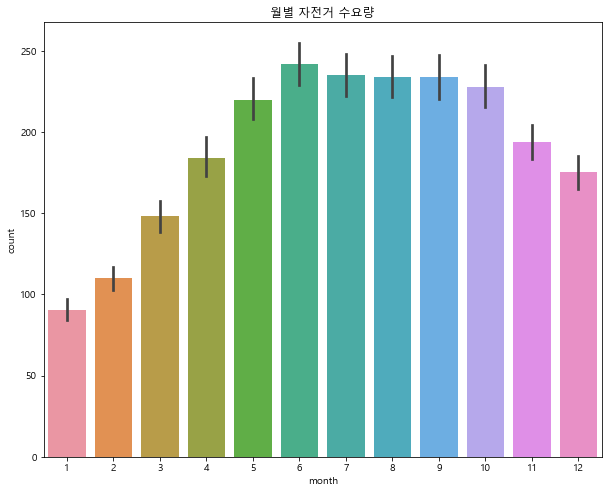

In [13]:
plt.figure(figsize=(10,8))
sns.barplot(data= train, x='month', y='count')
plt.title('월별 자전거 수요량')

### 4. 계절별 자전거 수요량

<AxesSubplot:xlabel='season', ylabel='count'>

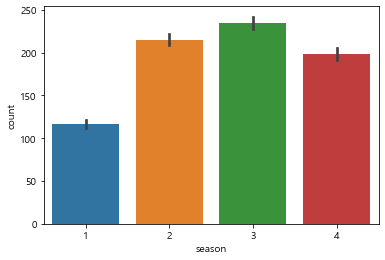

In [14]:
sns.barplot(data=train, x='season', y='count')

In [15]:
print(train[train['season'] == 1].month.unique())
print(train[train['season'] == 2].month.unique())
print(train[train['season'] == 3].month.unique())
print(train[train['season'] == 4].month.unique())

[1 2 3]
[4 5 6]
[7 8 9]
[10 11 12]


### 5. 시간대별 point plot

<AxesSubplot:xlabel='hour', ylabel='count'>

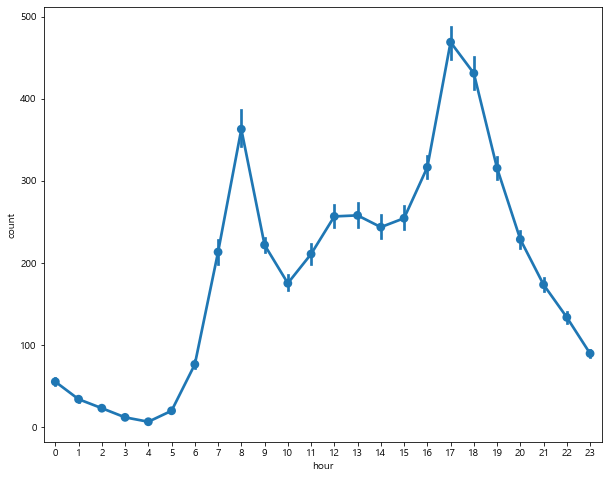

In [16]:
plt.figure(figsize=(10,8))
sns.pointplot(data=train, x='hour', y='count')

### 6. 카테고리형 시간대별 point plot

<AxesSubplot:xlabel='hour', ylabel='count'>

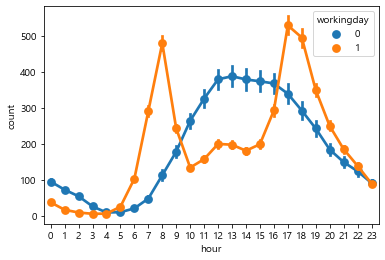

In [17]:
sns.pointplot(data = train, x='hour', y='count', hue='workingday')

### 7. 카테고리형(공휴일) 시간대별 point plot

<AxesSubplot:xlabel='hour', ylabel='count'>

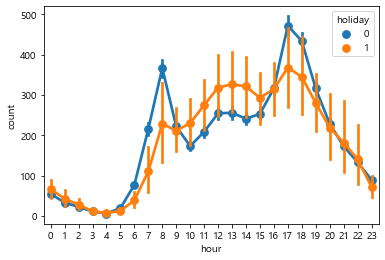

In [18]:
sns.pointplot(data=train, x='hour', y='count', hue='holiday')

### 8. 변수 간의 상관관계 구하기

C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

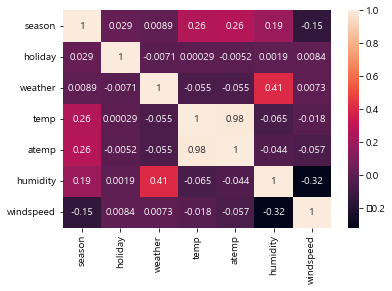

In [19]:
corr_data = train[['datetime', 'season', 'holiday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']]
sns.heatmap(corr_data.corr(),annot=True)

In [20]:
df = np.abs(corr_data.corr())
df

,season,holiday,weather,temp,atemp,humidity,windspeed
season,1.000000,0.029368,0.008879,0.258689,0.264744,0.190610,0.147121
holiday,0.029368,1.000000,0.007074,0.000295,0.005215,0.001929,0.008409
weather,0.008879,0.007074,1.000000,0.055035,0.055376,0.406244,0.007261
temp,0.258689,0.000295,0.055035,1.000000,0.984948,0.064949,0.017852
atemp,0.264744,0.005215,0.055376,0.984948,1.000000,0.043536,0.057473
humidity,0.190610,0.001929,0.406244,0.064949,0.043536,1.000000,0.318607
windspeed,0.147121,0.008409,0.007261,0.017852,0.057473,0.318607,1.000000


### 9. 온도 습도 바람세기에 대한 시각화

Text(0.5, 1.0, '바람세기와 Y의 관계')

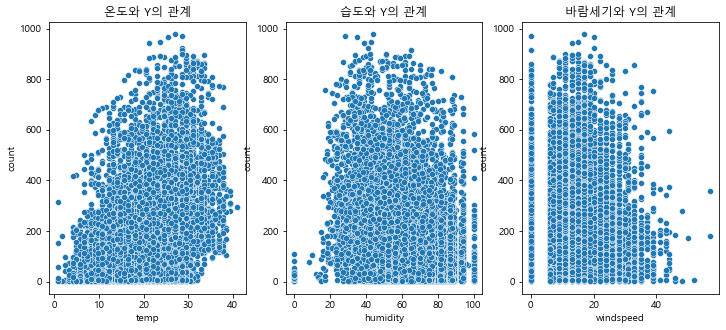

In [21]:
fig, ax = plt.subplots(1,3,figsize=(12,5))
sns.scatterplot(data=train, x='temp', y='count', ax=ax[0])
ax[0].set_title('온도와 Y의 관계')
sns.scatterplot(data=train, x='humidity', y='count', ax=ax[1])
ax[1].set_title('습도와 Y의 관계')
sns.scatterplot(data=train, x='windspeed', y='count', ax=ax[2])
ax[2].set_title('바람세기와 Y의 관계')

# 피쳐 엔지니어링

## 1. 이상치 제거

<AxesSubplot:ylabel='count'>

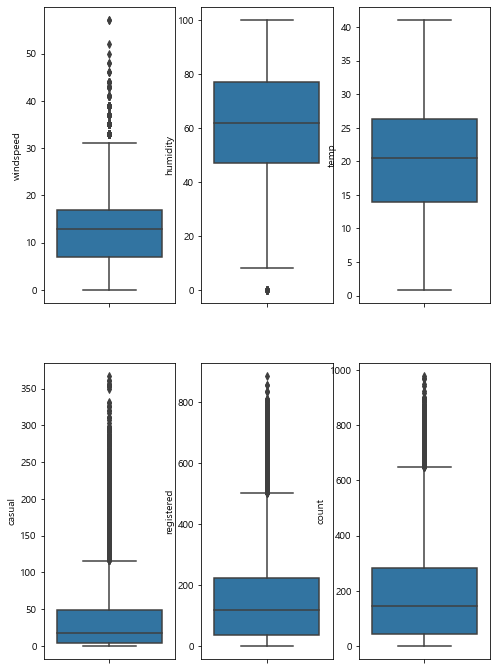

In [22]:
fig, ax = plt.subplots(2,3,figsize=(8,12))
sns.boxplot(data = train, y = 'windspeed', ax = ax[0][0])
sns.boxplot(data = train, y = 'humidity', ax = ax[0][1])
sns.boxplot(data = train, y = 'temp', ax = ax[0][2])
sns.boxplot(data = train, y = 'casual', ax = ax[1][0])
sns.boxplot(data = train, y = 'registered', ax = ax[1][1])
sns.boxplot(data = train, y = 'count', ax = ax[1][2])

In [23]:
def detect_outliers(data, n, cols):
    out = []
    for col in cols:
        Q1 = np.percentile(data[col], 25)
        Q3 = np.percentile(data[col], 75)
        IQR = Q3 - Q1
        
        outlier_step = 1.5 * IQR
        
        out.extend(data[(data[col] < Q1 - outlier_step) | (data[col] > Q3 + outlier_step)][col].index.tolist())
    out = list(set(out))
    data.drop(index = out,inplace=True)
    return data
    
train = detect_outliers(train, 2, ["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"])

<AxesSubplot:ylabel='count'>

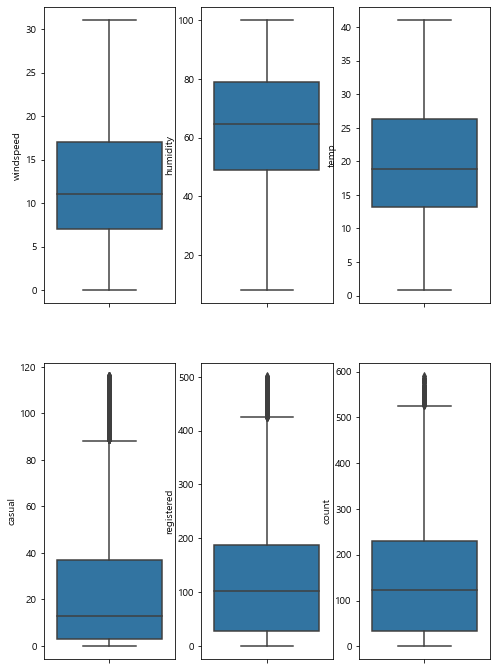

In [24]:
fig, ax = plt.subplots(2,3,figsize=(8,12))
sns.boxplot(data = train, y = 'windspeed', ax = ax[0][0])
sns.boxplot(data = train, y = 'humidity', ax = ax[0][1])
sns.boxplot(data = train, y = 'temp', ax = ax[0][2])
sns.boxplot(data = train, y = 'casual', ax = ax[1][0])
sns.boxplot(data = train, y = 'registered', ax = ax[1][1])
sns.boxplot(data = train, y = 'count', ax = ax[1][2])

## 2. 왜도 첨도 확인

skewness(왜도): 0.892342
kurtosis(첨도): 0.118282


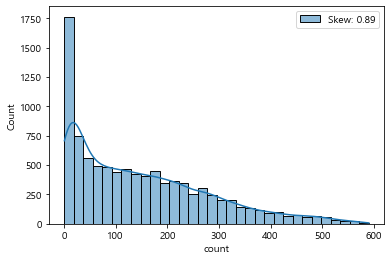

In [25]:
sns.histplot(data = train, x='count', kde=True, label = f'Skew: {train["count"].skew():.2f}')
plt.legend(loc='best')
print('skewness(왜도): %f' %train['count'].skew())
print('kurtosis(첨도): %f' %train['count'].kurt())

### 2-1. Log 정규화

In [26]:
train['count_log'] = np.log1p(train['count'])

왜도:  -0.8557577980332941
첨도:  -0.22365922207418976


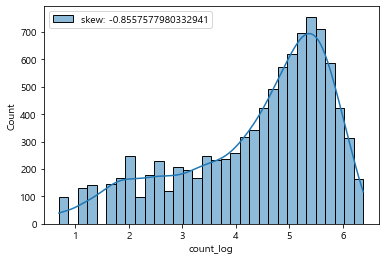

In [27]:
sns.histplot(data=train, x='count_log', kde=True, label=f'skew: {train["count_log"].skew()}')
plt.legend(loc='best')
print('왜도: ', train['count_log'].skew())
print('첨도: ', train['count_log'].kurt())

## 3. 결측치 예측하기 (windspeed=0)

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
def pred_wind(data):
    wind0 = data.loc[data['windspeed'] == 0]
    windno0 = data.loc[data['windspeed'] != 0]
    
    col = ['season', 'weather', 'temp', 'humidity', 'atemp', 'day']
    windno0['windspeed'] = windno0['windspeed'].astype('str')

    rf = RandomForestClassifier()
    rf.fit(windno0[col], windno0['windspeed'])
    
    pred = rf.predict(wind0[col])
    wind0['windspeed'] = pred
    
    data = pd.concat([wind0, windno0], axis=0)
    data['windspeed'] = data['windspeed'].astype('float')
    
    data.reset_index(inplace=True)
    data.drop('index', inplace=True, axis =1)
    return data

In [30]:
train = pred_wind(train)
test = pred_wind(test)

C:\Users\김준석\AppData\Local\Temp/ipykernel_18680/497205261.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  windno0['windspeed'] = windno0['windspeed'].astype('str')
C:\Users\김준석\AppData\Local\Temp/ipykernel_18680/497205261.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind0['windspeed'] = pred
C:\Users\김준석\AppData\Local\Temp/ipykernel_18680/497205261.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [31]:
train[train['windspeed']==0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,min,sec,dayofweek,count_log


## 4. 원핫인코딩

In [32]:
train = pd.get_dummies(train, columns=['weather'], prefix = 'weather')
test = pd.get_dummies(test, columns=['weather'], prefix='weather')

train = pd.get_dummies(train, columns=['season'], prefix='season')
test = pd.get_dummies(test, columns=['season'], prefix='season')

train = pd.get_dummies(train, columns = ['holiday'], prefix = 'holiday')
test = pd.get_dummies(test, columns = ['holiday'], prefix = 'holiday')

In [33]:
train.columns

Index(['datetime', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'count', 'year', 'month', 'day', 'hour', 'min',
       'sec', 'dayofweek', 'count_log', 'weather_1', 'weather_2', 'weather_3',
       'weather_4', 'season_1', 'season_2', 'season_3', 'season_4',
       'holiday_0', 'holiday_1'],
      dtype='object')

In [34]:
test_datetime = test['datetime']

train.drop(['datetime', 'workingday', 'atemp', 'registered', 'casual', 'min', 'sec','count'], axis = 1, inplace = True)
test.drop(['datetime', 'workingday', 'atemp', 'min', 'sec'], axis = 1, inplace = True) 

In [35]:
train.columns

Index(['temp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour',
       'dayofweek', 'count_log', 'weather_1', 'weather_2', 'weather_3',
       'weather_4', 'season_1', 'season_2', 'season_3', 'season_4',
       'holiday_0', 'holiday_1'],
      dtype='object')

In [36]:
test.columns

Index(['temp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour',
       'dayofweek', 'weather_1', 'weather_2', 'weather_3', 'weather_4',
       'season_1', 'season_2', 'season_3', 'season_4', 'holiday_0',
       'holiday_1'],
      dtype='object')

# Modeling

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [38]:
x = train.drop('count_log', axis = 1)
target_label = train['count_log']
y = test

x_train, x_val, y_train, y_val = train_test_split(x, target_label, test_size = 0.2, random_state = 2000)

In [39]:
x_train.columns

Index(['temp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour',
       'dayofweek', 'weather_1', 'weather_2', 'weather_3', 'weather_4',
       'season_1', 'season_2', 'season_3', 'season_4', 'holiday_0',
       'holiday_1'],
      dtype='object')

In [40]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor

In [41]:
def model_1(x_train, x_val, y_train, y_val):
    lr = LinearRegression()
    ri = Ridge()
    la = Lasso()
    rf = RandomForestRegressor()
    model_list = ['선형회귀', '릿지', '라쏘', '랜덤포레스트']
    
    for i, model in enumerate([lr, ri, la, rf]):
        model.fit(x_train, y_train)
        pred = model.predict(x_val)
        print(f'{model_list[i]} MSE: {mse(y_val, pred):.8f}')

In [42]:
model_1(x_train, x_val, y_train, y_val)

선형회귀 MSE: 1.07327133
릿지 MSE: 1.07327966
라쏘 MSE: 1.20079349
랜덤포레스트 MSE: 0.08940865


In [43]:
# from sklearn.ensemble import GradientBoostingRegressor
# regressor = GradientBoostingRegressor(n_estimators = 2000, learning_rate = 0.05
#                                     , max_depth = 5
#                                     , min_samples_leaf = 15
#                                     , min_samples_split = 10
#                                     , random_state = 42)
# #model.fit(x, y)
# regressor.fit(x_train, y_train)

In [44]:
# pred = regressor.predict(x_val)
# print(mse(y_val, pred))

# 파라미터 최적화 - GridSearch

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
parm = {'max_depth': [2,3,5,10,20], 'min_samples_split':[2,3,5,10], 'min_samples_leaf':[1,5,8,10]}

rf = RandomForestRegressor()
gs = GridSearchCV(rf, parm, cv=5)
gs.fit(x_train, y_train)

print('최적 파라미터: ', gs.best_params_)
print('최고 정확도: ', gs.best_score_)

best_gs = gs.best_estimator_
pred = best_gs.predict(x_val)

print(mse(y_val, pred))

최적 파라미터:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
최고 정확도:  0.9422376180310031
0.09081334744648281


In [47]:
x_val.columns

Index(['temp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour',
       'dayofweek', 'weather_1', 'weather_2', 'weather_3', 'weather_4',
       'season_1', 'season_2', 'season_3', 'season_4', 'holiday_0',
       'holiday_1'],
      dtype='object')

In [49]:
pred = best_gs.predict(test)

# 제출파일 생성

In [50]:
sample = pd.read_csv("SampleSubmission.csv")
sample.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [51]:
submission = pd.DataFrame()
submission['datetime'] = test_datetime
submission['count_log'] = pred

In [52]:
submission['count'] = np.expm1(submission['count_log'])
    
submission.drop('count_log', axis = 1, inplace = True)
submission.head()

,datetime,count
0,2011-01-20 01:00:00,5.344097
1,2011-01-20 02:00:00,4.127677
2,2011-01-20 12:00:00,57.617357
3,2011-01-22 13:00:00,52.220361
4,2011-01-22 15:00:00,62.180853


In [53]:
submission.to_csv("Bike.csv", index = False)